In [18]:
import os

import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras import regularizers

import raw_data_loader as data_loader

import model_runner

In [2]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
edfs_path = "../../../dataverse_files"
save_path = '../../../Results/LSTM'

In [4]:
signal_segment_len = 5.0
data_split_ratio = 0.2
seed=1337

learning_rate = 0.001
epochs_n = 150
patience = 15
batch_size = 32
validation_split = 0.2

input_shape=None

### Loading data from edf files, segmenting and splitting to train and test datasets

In [5]:
X_train, X_test, y_train, y_test = data_loader.load_and_split_data(edfs_path, signal_segment_len, data_split_ratio, seed)

Not setting metadata
5771 matching events found
No baseline correction applied
0 bad epochs dropped

Epochs number per patient:  [185, 182, 182, 185, 189, 186, 182, 182, 181, 223, 183, 180, 193, 173, 169, 229, 192, 241, 178, 148, 269, 182, 237, 170, 272, 217, 227, 434]

negative:  3165
positive:  2606

X_train shape: (4616, 1250, 19)
X_test shape: (1155, 1250, 19)

input shape: (1250, 19)


In [6]:
input_shape = data_loader.input_shape
input_shape

(1250, 19)

## Models

### No dropout

In [7]:
from tensorflow.keras import layers

def build_model_LSTM128_Dense32(input_shape, opt):    
    model = Sequential()
    
    model.add(LSTM(128,input_shape=input_shape))
#     model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'LSTM128_Dense32'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

batch size: 32
learning rate: 0.001
epochs: 5
Model: "LSTM100-Drop05-Dense32-Drop04"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               48000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,265
Trainable params: 51,265
Non-trainable params: 0
_____________________________________________________

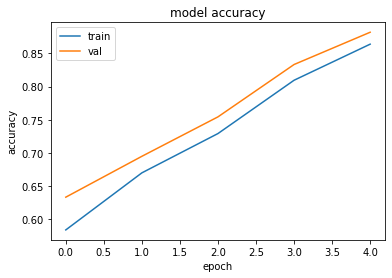

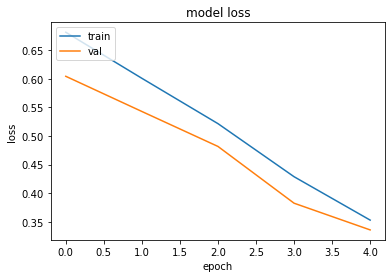

Test Accuracy: 0.8701298701298701
F1 score: 0.883177570093458


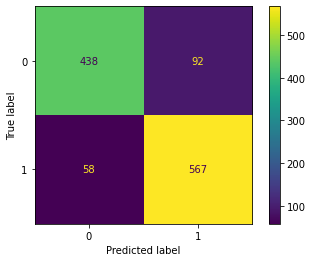

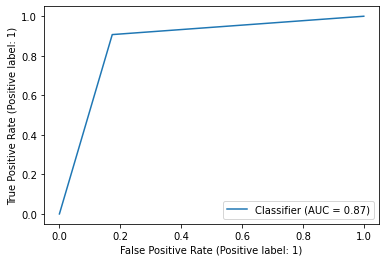

In [9]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_LSTM128_Dense32, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

## LSTM Dropout

In [ ]:
from tensorflow.keras import layers

def build_model_LSTM128_Drop05_Dense32(input_shape, opt):    
    model = Sequential()
    
    model.add(LSTM(128,input_shape=input_shape, dropout=0.5))
#     model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'LSTM128_Drop05_Dense32'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

In [ ]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_LSTM128_Drop05_Dense32, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

### LSTM and Dense Dropout

In [14]:
from tensorflow.keras import layers

def build_model_LSTM128_Drop05_Dense32_Drop04(input_shape, opt):    
    model = Sequential()
    
    model.add(LSTM(128,input_shape=input_shape, dropout=0.5))
#     model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'LSTM128_Drop05_Dense32_Drop04'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

In [15]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_LSTM128_Drop05_Dense32_Drop04, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

batch size: 32
learning rate: 0.001
epochs: 300
Model: "LSTM100-Drop05-Dense32-Drop04"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               75776     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 79,937
Trainable params: 79,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
116/116 [==============================] - 17s 132ms/step - loss: 0.5805 - accuracy: 0.6717 - val_loss: 0.4989 - val_accuracy: 0.7565
Epoch 2/300
116/116 [==============================] - 15s 128ms/step - loss: 0.3883 - accuracy: 0.8307


KeyboardInterrupt



### LSTM Dropout and Recurrent Dropout Dense Dropout

In [16]:
from tensorflow.keras import layers

def build_model_LSTM128_Drop05_RecDrop05_Dense32_Drop04(input_shape, opt):    
    model = Sequential()
    
    model.add(LSTM(128,input_shape=input_shape, dropout=0.5, recurrent_dropout=0.5))
#     model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'LSTM128_Drop05_RecDrop05_Dense32_Drop04'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

In [17]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_LSTM128_Drop05_RecDrop05_Dense32_Drop04, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

batch size: 32
learning rate: 0.001
epochs: 300
Model: "LSTM100-Drop05-Dense32-Drop04"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               75776     
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 79,937
Trainable params: 79,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
116/116 [==============================] - 17s 130ms/step - loss: 0.5866 - accuracy: 0.6693 - val_loss: 0.5187 - val_accuracy: 0.7175
Epoch 2/300
 15/116 [==>...........................] - ETA: 11s - loss: 0.4267 - accuracy: 0.8229

KeyboardInterrupt: 

### Bidirectional LSTM Dropout and Recurrent Dropout Dense Dropout

In [29]:
from tensorflow.keras import layers

def build_model_Bidirectional_LSTM128_Drop05_RecDrop05_Dense10(input_shape, opt):    
    
    model = Sequential()

    model.add(Bidirectional(
        LSTM(128,input_shape=input_shape, dropout=0.5, return_sequences=True),
        input_shape=input_shape))
    
    model.add(Bidirectional(LSTM(32, dropout=0.5)))
    
    model.add(Dense(10))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'Bidirectional_LSTM128_Drop05_RecDrop05_Dense10'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

In [30]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_Bidirectional_LSTM128_Drop05_RecDrop05_Dense10, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

batch size: 32
learning rate: 0.001
epochs: 300
Model: "Bidirectional_LSTM128_Drop05_RecDrop05_Dense10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 1250, 256)        151552    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 226,197
Trainable params: 226,197
Non-trainable params: 0
________________________________


KeyboardInterrupt

